# Example Nootebook

## Preliminaries

At first we imports numpy for generate distributions and class Landshaft containing general logic of peaks-and-lowlands module.

In [1]:
import numpy as np
from src import Landshaft

Secondly, we generate five samples with a power of $10^4$ from different normal distributions as an example.

In [2]:
np.random.seed(12)


mean, sigma, n = [0, 8, 3, 14, 18], [1, 1.5, 0.5, 2, 0.7], 200000
x1 = np.random.normal(mean[0], sigma[0], n)
x2 = np.random.normal(mean[1], sigma[1], n)
x3 = np.random.normal(mean[2], sigma[2], n)
x4 = np.random.normal(mean[3], sigma[3], n)
x5 = np.random.normal(mean[4], sigma[4], n)
x = np.concatenate([x1,x2,x3,x4,x5])   
x=x


## Landshaft evaluating

Now create ladshaft object, define number of quantiles using for distribution density function estimation as 100. Threshold for counting area as lowland sets 0.33

In [3]:

landshaft = Landshaft(x=x,q_num=100, threshold=0.33)


It's time to run main algorithm calculations. We should to call the `build_landshaft` function to do this.
After it is executed, all the required values will be stored in landshaft attributes and we can visualize results.


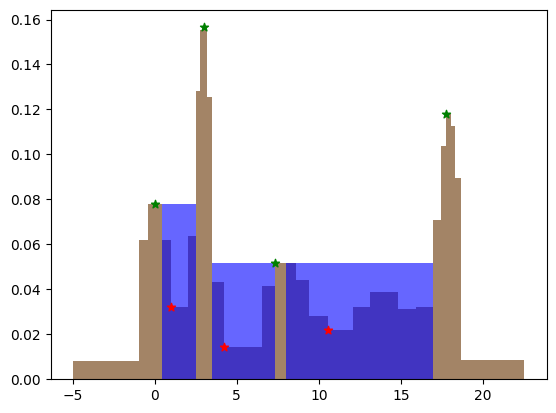

In [4]:
landshaft.build_landshaft()
landshaft.plot_ponds_and_peaks()

As we can see on graph above, our algorithm detect three deep ponds over lowlands (saturated blue area) with it's minimums (red stars), that separate four modes (gren stars). Also it is remains six unmerged ponds with shallow water (light-blue). 

## Modes retrieving

Modes in form of the ExtremumArray class object are laid in attribute `modes` of `landshaft` object. This class wrapping iterable of Extremum class objects. Each of later contain a Bin class object with $x$-coordinate of left border, height, and width of bin from density distribution function estimation (colored in light-brown on graph above). 

The ExtremumArray class provides us with instance functions for obtaining the left border coordinates, widths, or heights of all the extremum bins it contains in the form of a numpy ndarray at once.

In [5]:
print(f"The x coords of modes are: {landshaft.modes.get_bins_start()
                                + landshaft.modes.get_bins_width()/2}")
print(f"The y coords of modes are: {landshaft.modes.get_bins_height()}")

The x coords of modes are: [ 0.21606463  3.10704967  7.66369692 17.89127737]
The y coords of modes are: [0.07800567 0.15654698 0.05182866 0.1180678 ]


In [6]:
print(f"The x coords of minimums are: {landshaft.min_between_modes.get_bins_start() 
                                    + landshaft.min_between_modes.get_bins_width()/2}")
print(f"The y coords of minimums are: {landshaft.min_between_modes.get_bins_height()}")

The x coords of minimums are: [ 1.48526148  5.39414844 11.33435598]
The y coords of minimums are: [0.03229902 0.01456887 0.02194116]
